##**Introduction to geodata visualization with geopandas**

**Documentation**: https://geopandas.org/en/stable/getting_started.html

**Installation**:

`$ pip install geopandas`

*OR*

`$ conda install -c conda-forge geopandas`



<br>

*Open the notebook in **GoogleColab** to check the outputs!*.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/105THGnjRyWij4IsCEoRtMlsBL3O-h7lK?usp=sharing)


In [ ]:
# installing geopandas
!pip install geopandas

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### **Data**
We have one CSV file containing the data to plot, and a shapefile (SHP) containing the geospatial data. For plotting, let's use a simplified version of the [real estate listings for Georgia (US) published in Kaggle](https://www.kaggle.com/datasets/yellowj4acket/real-estate-georgia). The geospatial data for Georgia State was obtained from [here](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html).

In [ ]:
# loading data
ga_data = pd.read_csv('data/datasets/georgia_real_estate.csv')
ga_data.head()

,id,countyId,cityId,price,pricePerSquareFoot,city,streetAddress,zipcode,longitude,latitude,bathrooms,bedrooms,hasGarage,pool,homeType,county
0,31503-110785431,17,55064,169900,74,Waycross,103 Hog Creek Rd,31503,-82.232475,31.200703,3,4,0,0,SINGLE_FAMILY,Brantley County
1,31503-76611082,18,55064,159000,56,Waycross,605 Ware St,31503,-82.365105,31.213835,2,4,0,0,SINGLE_FAMILY,Ware County
2,31503-93126153,19,55064,45000,62,Waycross,1961 Mount Pleasant Rd,31503,-82.327118,31.210838,1,1,0,0,SINGLE_FAMILY,Ware County
3,31503-110785598,20,55064,165000,102,Waycross,39 Joyce Rd,31503,-82.231300,31.169851,2,2,0,0,SINGLE_FAMILY,Brantley County
4,31503-2101070583,21,55064,128593,0,Waycross,0 Swamp Rd,31503,-82.405525,31.045984,0,0,0,0,LOT,Ware County


In [ ]:
# loading geo data
ga_counties = f"data/geo_data/GISPORTAL_GISOWNER01_GACOUNTIES10Polygon.shp"

# let's check the content of the shapefile file:
gageo_df = gpd.read_file(ga_counties)
gageo_df.head()

,statefp10,countyfp10,countyns10,geoid10,name10,namelsad10,lsad10,classfp10,mtfcc10,csafp10,cbsafp10,metdivfp10,funcstat10,aland10,awater10,intptlat10,intptlon10,geometry
0,13,173,00348102,13173,Lanier,Lanier County,06,H1,G4020,None,46660,None,A,4.798244e+08,37625302.0,+31.0381973,-083.0631635,"POLYGON ((-83.04292 30.94730, -83.04303 30.947..."
1,13,029,00350496,13029,Bryan,Bryan County,06,H1,G4020,496,42340,None,A,1.129148e+09,47887043.0,+32.0179692,-081.4385431,"POLYGON ((-81.40496 31.93700, -81.40498 31.937..."
2,13,001,00349113,13001,Appling,Appling County,06,H1,G4020,None,None,None,A,1.313334e+09,13417422.0,+31.7397120,-082.2901025,"POLYGON ((-82.45868 31.83810, -82.43136 31.837..."
3,13,241,00351489,13241,Rabun,Rabun County,06,H1,G4020,None,None,None,A,9.582766e+08,17845339.0,+34.8830262,-083.4047353,"POLYGON ((-83.61815 34.91143, -83.61794 34.911..."
4,13,023,00347451,13023,Bleckley,Bleckley County,06,H1,G4020,None,None,None,A,5.591002e+08,8447354.0,+32.4354034,-083.3317174,"POLYGON ((-83.29782 32.54975, -83.29779 32.549..."


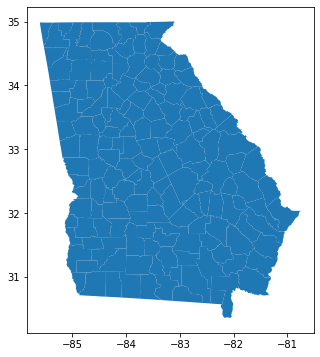

In [ ]:
# previewing the map: plotting the map from the shape file
gageo_df.plot(figsize=(6,6))

Let's now join the geodata with the dataset.

In [ ]:
# adding a column to the dataset for the county geometry taken from the geodata
gageo_df.rename(columns={'namelsad10':'county'}, inplace=True) # renaming the column Name in geodata
ga_counties_geo = gpd.GeoDataFrame(ga_data.merge(gageo_df[['county', 'geometry']], on='county', how='left'))
ga_counties_geo.head()

,id,countyId,cityId,price,pricePerSquareFoot,city,streetAddress,zipcode,longitude,latitude,bathrooms,bedrooms,hasGarage,pool,homeType,county,geometry
0,31503-110785431,17,55064,169900,74,Waycross,103 Hog Creek Rd,31503,-82.232475,31.200703,3,4,0,0,SINGLE_FAMILY,Brantley County,"POLYGON ((-81.91012 31.34722, -81.90994 31.347..."
1,31503-76611082,18,55064,159000,56,Waycross,605 Ware St,31503,-82.365105,31.213835,2,4,0,0,SINGLE_FAMILY,Ware County,"POLYGON ((-82.38721 31.29711, -82.38647 31.297..."
2,31503-93126153,19,55064,45000,62,Waycross,1961 Mount Pleasant Rd,31503,-82.327118,31.210838,1,1,0,0,SINGLE_FAMILY,Ware County,"POLYGON ((-82.38721 31.29711, -82.38647 31.297..."
3,31503-110785598,20,55064,165000,102,Waycross,39 Joyce Rd,31503,-82.231300,31.169851,2,2,0,0,SINGLE_FAMILY,Brantley County,"POLYGON ((-81.91012 31.34722, -81.90994 31.347..."
4,31503-2101070583,21,55064,128593,0,Waycross,0 Swamp Rd,31503,-82.405525,31.045984,0,0,0,0,LOT,Ware County,"POLYGON ((-82.38721 31.29711, -82.38647 31.297..."


**Visualizing Data in Maps**

Choropleth

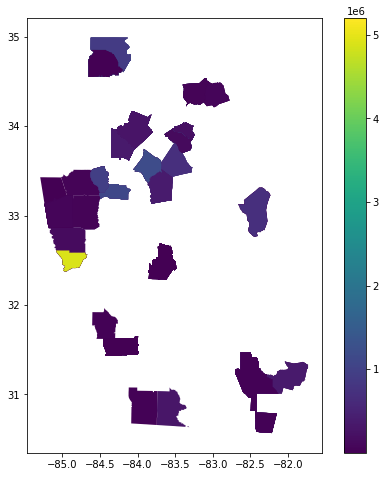

In [ ]:
ga_counties_geo.plot("price", legend=True, figsize=(8,8))

This map should and can be improved. For instance, the sample dataset does not contain records for every single county in Georgia, hence the missing polygons. It may be hard to understand this map without the state boundaries.

Let's create a map with layers so we can plot all counties and "*highlight*" the ones we have data of.

In [ ]:
# Maps with Layers

# Note: always ensure that the maps share a common CRS so they will align.
ga_counties_geo = ga_counties_geo.to_crs(gageo_df.crs)

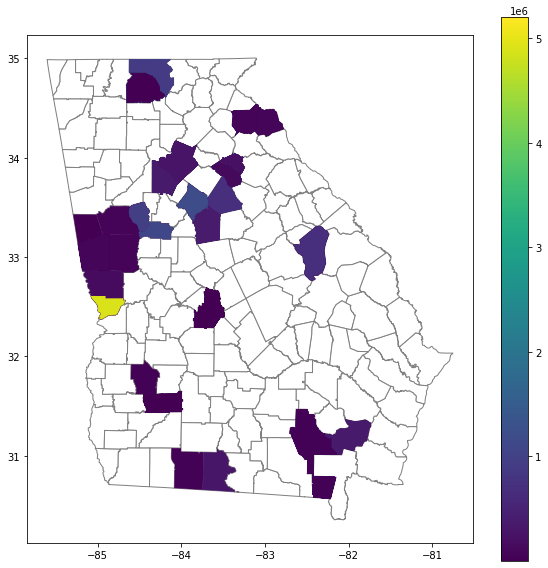

In [ ]:
# for the base layer, let's plot the boundaries of all Georgia counties
fig,ax = plt.subplots(figsize=(10,10))
base = gageo_df.plot(color='white', edgecolor='gray', ax=ax)
# now, let's plot the data (Choropleth map)
ga_counties_geo.plot("price", legend=True, ax=base)

<u>Customizing the Map</u>

There a couple of things we can do to customize the map:


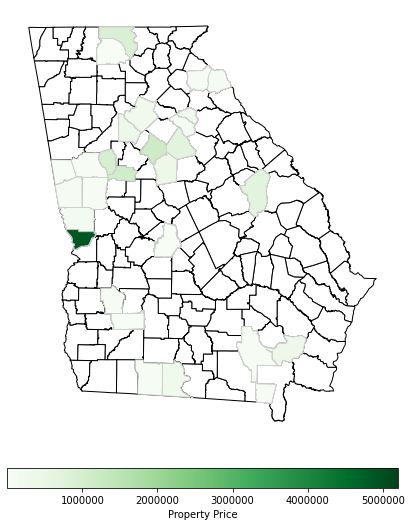

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))

base = gageo_df.plot(color='white', edgecolor='black', ax=ax)

map = ga_counties_geo.plot("price", legend=True, ax=base, 
                     cmap='Greens', # customize the color palette (ex: BuGn, OrRd, winter, cubehelix, autumn, hot, RdBu_r etc.)
                     linewidth=0.8, 
                     edgecolor='0.8',
                     legend_kwds={'label': "Property Price",
                        'orientation': "horizontal", # orientation of the legend
                        'pad': 0.05, # controlling white space between the map and the legend
                        'format':"%.0f", # removing scientific notation of the legend
                        'shrink': 0.7 # adjusting size of the legend
                        } 
                     )
# setting axis off
map.set_axis_off()

Plotting points

In this case, the geometry will be Point-based instead of Polygon-based.

In [ ]:
from shapely.geometry import Point

ga_counties_geo2 = ga_counties_geo.copy()
ga_counties_geo2['geometry'] = [Point(xy) for xy in zip(ga_counties_geo2.longitude, ga_counties_geo2.latitude)]
ga_counties_geo2.head()

,id,countyId,cityId,price,pricePerSquareFoot,city,streetAddress,zipcode,longitude,latitude,bathrooms,bedrooms,hasGarage,pool,homeType,county,geometry
0,31503-110785431,17,55064,169900,74,Waycross,103 Hog Creek Rd,31503,-82.232475,31.200703,3,4,0,0,SINGLE_FAMILY,Brantley County,POINT (-82.23248 31.20070)
1,31503-76611082,18,55064,159000,56,Waycross,605 Ware St,31503,-82.365105,31.213835,2,4,0,0,SINGLE_FAMILY,Ware County,POINT (-82.36510 31.21383)
2,31503-93126153,19,55064,45000,62,Waycross,1961 Mount Pleasant Rd,31503,-82.327118,31.210838,1,1,0,0,SINGLE_FAMILY,Ware County,POINT (-82.32712 31.21084)
3,31503-110785598,20,55064,165000,102,Waycross,39 Joyce Rd,31503,-82.231300,31.169851,2,2,0,0,SINGLE_FAMILY,Brantley County,POINT (-82.23130 31.16985)
4,31503-2101070583,21,55064,128593,0,Waycross,0 Swamp Rd,31503,-82.405525,31.045984,0,0,0,0,LOT,Ware County,POINT (-82.40553 31.04598)


Plotting every record as a point in the map:

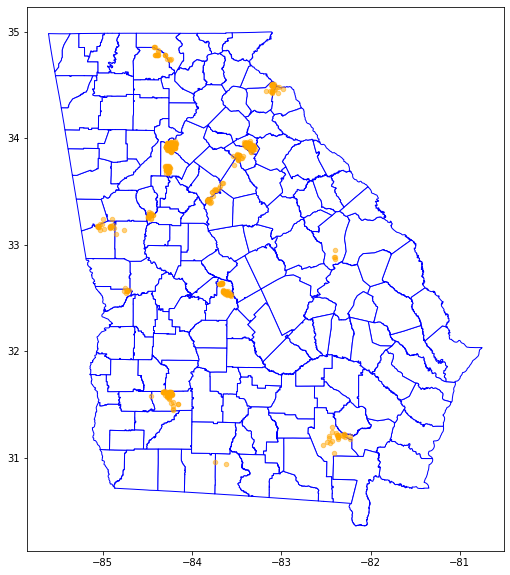

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))

base = gageo_df.plot(color='white', edgecolor='blue', ax=ax)
ga_counties_geo2.plot(color= 'orange', marker='o', markersize=20, ax=base, alpha=0.5)

Plotting every record as a point in the map (legend based on categorical variable):

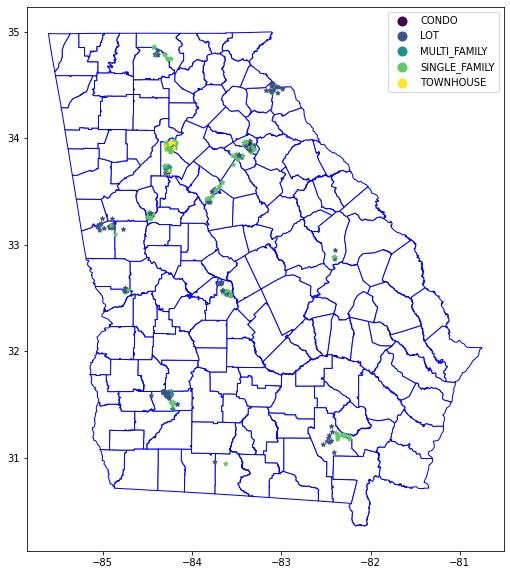

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))

base = gageo_df.plot(color='white', edgecolor='blue', ax=ax)
ga_counties_geo2.plot('homeType', marker='*', markersize=20, ax=base, legend=True, cmap='viridis')

Plotting every record as a point in the map (legend based on quantitative variable):

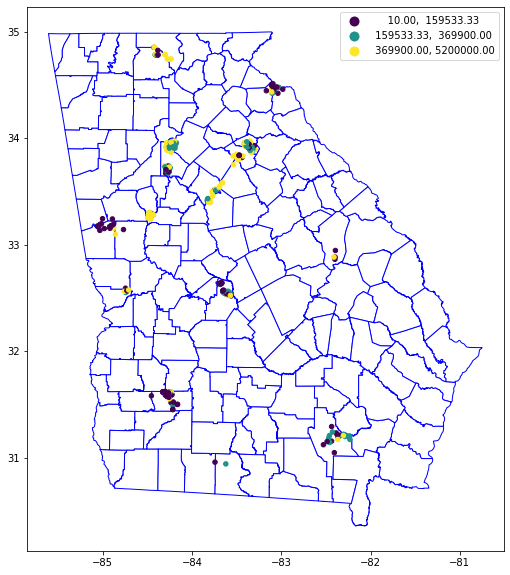

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))

base = gageo_df.plot(color='white', edgecolor='blue', ax=ax)
ga_counties_geo2.plot('price', markersize=20, ax=base, legend=True, cmap='viridis',
                      scheme='quantiles', k=3 # classifying by quantiles. QUANTILES place an equal number of observations in each class, 3 in this case (set by k=3).
                      )

Exploring maps interactively

The 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'. Folium version must be 0.12 or newer.


In [ ]:
!pip install folium mapclassify

In [206]:
ga_counties_geo2.explore('homeType', legend=True, cmap='viridis')

Saving the map

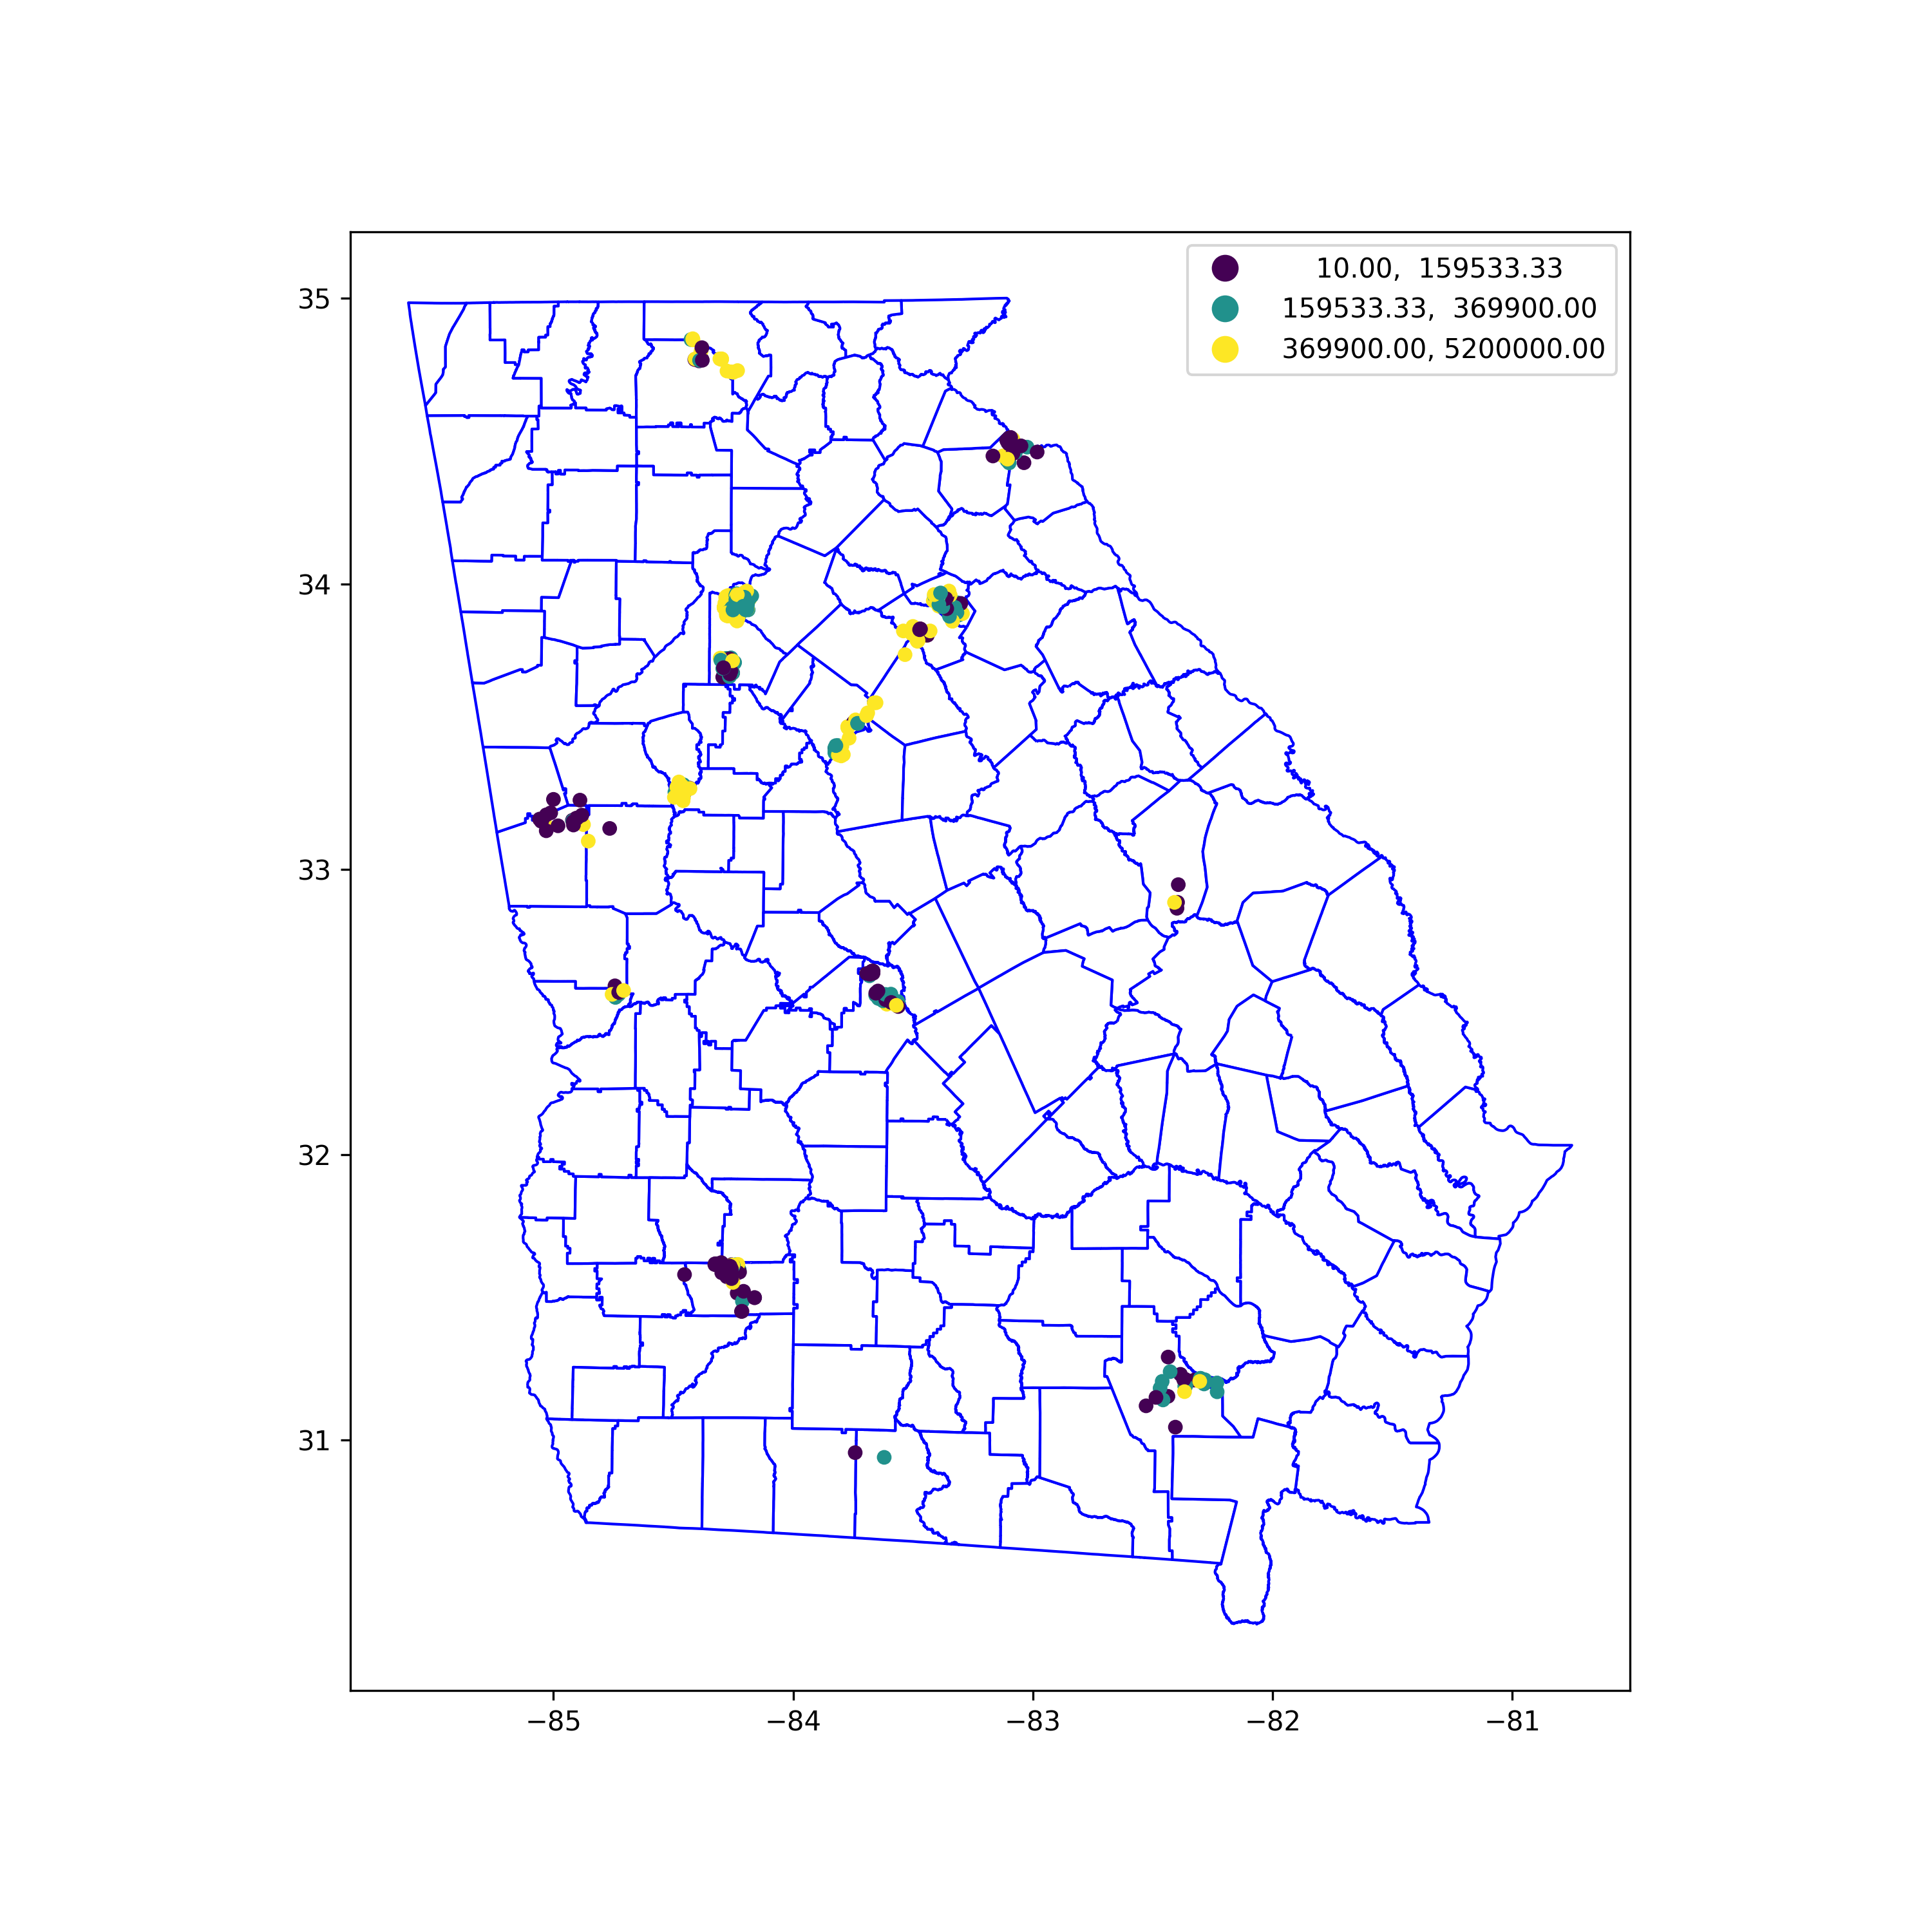

In [184]:
fig.savefig('map_geopandas.png', dpi=300)

# loading the saved map
from IPython.display import Image
Image('map_geopandas.png', width = 800, height = 800)

Writing Files

To write the Geofataframe back to a file, we can use *to_file()*.  The default file format is Shapefile, but another format can be specified with the *driver* keyword.

In [ ]:
ga_counties_geo.to_file("ga_realestate_geom1.shp")
ga_counties_geo.to_file("ga_realestate_geom2.geojson", driver="GeoJSON")